In [1]:
options(repr.plot.width=8, repr.plot.height=4)

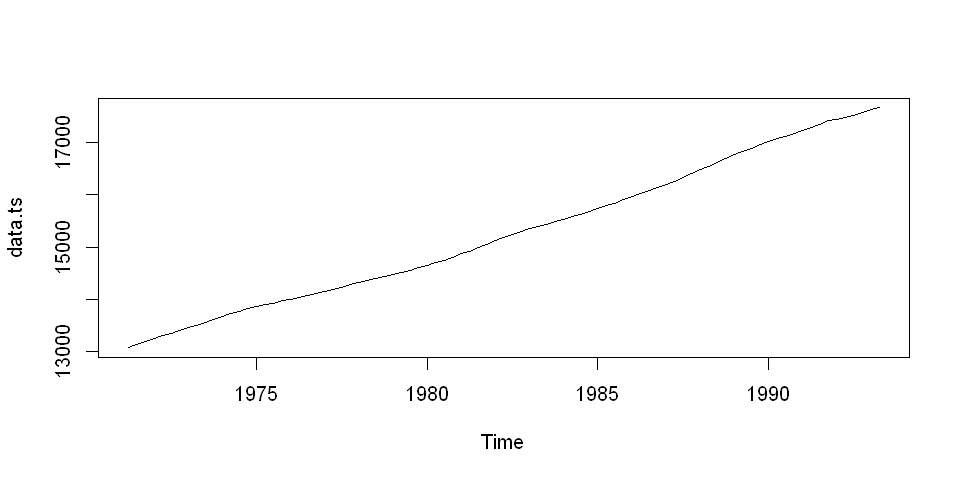

In [2]:
data.ts <- austres
plot(data.ts)

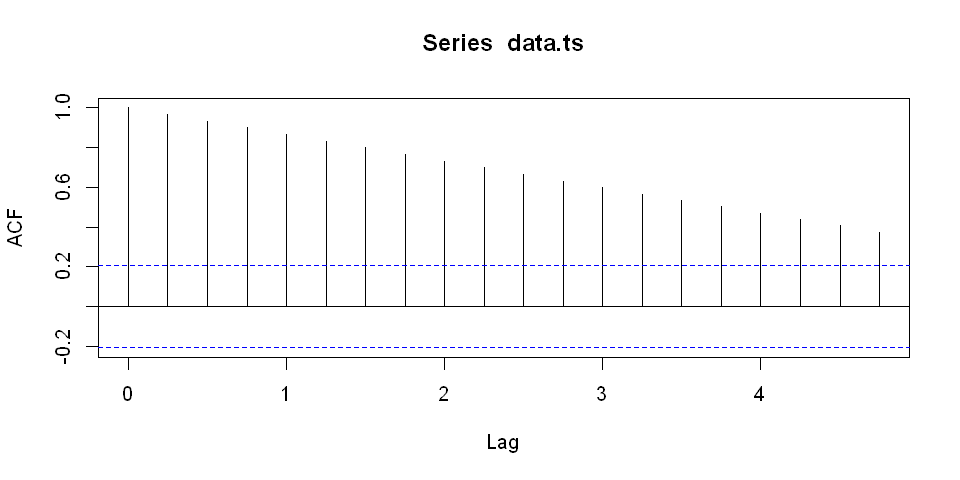

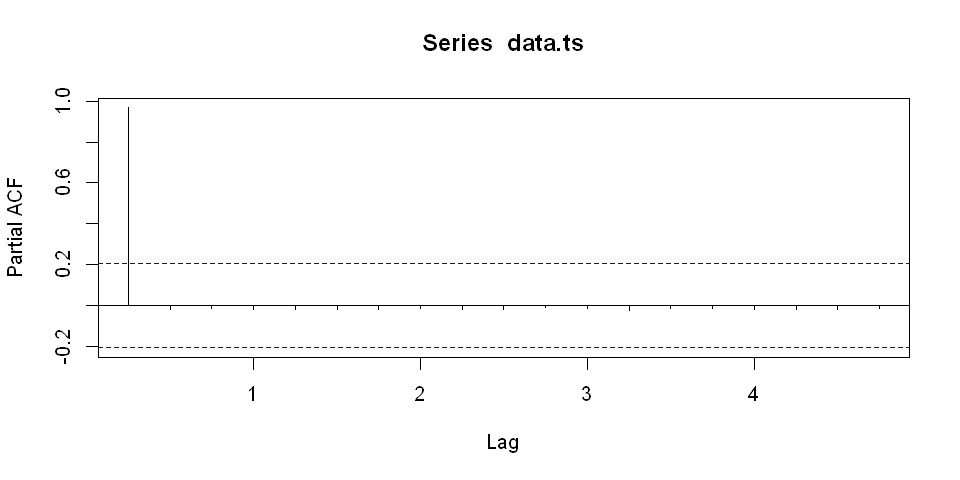

In [3]:
acf(data.ts)
pacf(data.ts)

## Manual calcuation

In [4]:
alpha <- 0.9
beta <- 0.5
manual.forecast <- NULL
level <- NULL
trend <- NULL

level[1] <- data.ts[1]
trend[1] <- data.ts[2] - data.ts[1]
manual.forecast[1] <- data.ts[1]
manual.forecast[2] <- data.ts[2]

for (n in 2:length(data.ts)) {
    level[n] <- alpha * data.ts[n] + (1 - alpha)*(level[n-1] + trend[n-1])
    trend[n] <- beta * (level[n] - level[n-1]) + (1 - beta)*trend[n-1]
    manual.forecast[n+1] <- level[n] + trend[n]
}

manual.forecast[3:12]

[1] 13193.70 13263.25 13316.35 13360.52 13407.14 13462.63 13511.55 13554.04
 [9] 13600.93 13667.17

Verify calculation with HoltWinters function

In [5]:
model <- HoltWinters(data.ts, alpha=0.9, beta=0.5, gamma=F)
model$fitted[1:10]

[1] 13193.70 13263.25 13316.35 13360.52 13407.14 13462.63 13511.55 13554.04
 [9] 13600.93 13667.17

## Use HoltWinters function

In [6]:
model <- HoltWinters(data.ts, gamma=F)
model

Holt-Winters exponential smoothing with trend and without seasonal component.

Call:
HoltWinters(x = data.ts, gamma = F)

Smoothing parameters:
 alpha: 1
 beta : 0.4062519
 gamma: FALSE

Coefficients:
        [,1]
a 17661.5000
b    43.2471

Warning message:
"package 'forecast' was built under R version 3.6.1"

        Point Forecast    Lo 80    Hi 80    Lo 95    Hi 95
1993 Q3       17704.75 17691.80 17717.70 17684.94 17724.56
1993 Q4       17747.99 17725.64 17770.34 17713.81 17782.17
1994 Q1       17791.24 17758.83 17823.65 17741.67 17840.81
1994 Q2       17834.49 17791.17 17877.81 17768.24 17900.74
1994 Q3       17877.74 17822.67 17932.80 17793.52 17961.95
1994 Q4       17920.98 17853.35 17988.61 17817.55 18024.41
1995 Q1       17964.23 17883.26 18045.20 17840.40 18088.06
1995 Q2       18007.48 17912.43 18102.53 17862.11 18152.84

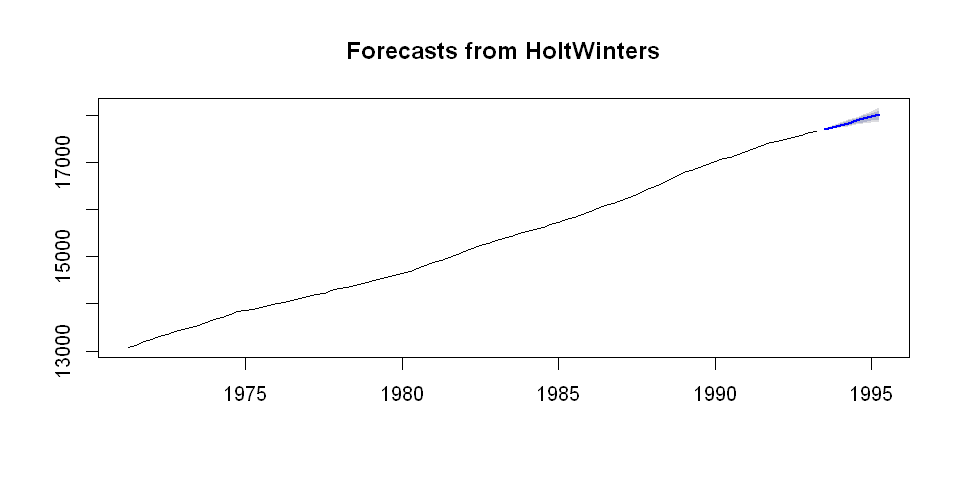

In [7]:
suppressMessages(library(forecast))
model.forecast <- forecast(model)
model.forecast

plot(model.forecast)